In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

In [2]:
%matplotlib inline

# Step 1: Load and Preprocess the Data

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Check the shape and type of the data

In [4]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"Data type of x_train: {x_train.dtype}, Data type of y_train: {y_train.dtype}")


x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)
Data type of x_train: uint8, Data type of y_train: uint8


# Step 2: Normalize the Data

### Check the range of pixel values in the dataset


In [5]:
print(f"Pixel value range before normalization: {x_train.min()} to {x_train.max()}")


Pixel value range before normalization: 0 to 255


In [6]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Verify the normalization
print(f"Pixel value range after normalization: {x_train.min()} to {x_train.max()}")


Pixel value range after normalization: 0.0 to 1.0


# Step 3: Reshape the Data

In [8]:
# Check the shape before reshaping
print(f"Shape of x_train before reshaping: {x_train.shape}")
print(f"Shape of x_test before reshaping: {x_test.shape}")

Shape of x_train before reshaping: (60000, 28, 28)
Shape of x_test before reshaping: (10000, 28, 28)


In [9]:
# Add a channel dimension (for grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
# Verify the reshaping
print(f"Shape of x_train after reshaping: {x_train.shape}")
print(f"Shape of x_test after reshaping: {x_test.shape}")

Shape of x_train after reshaping: (60000, 28, 28, 1)
Shape of x_test after reshaping: (10000, 28, 28, 1)


# Step 4: Visualize the Data

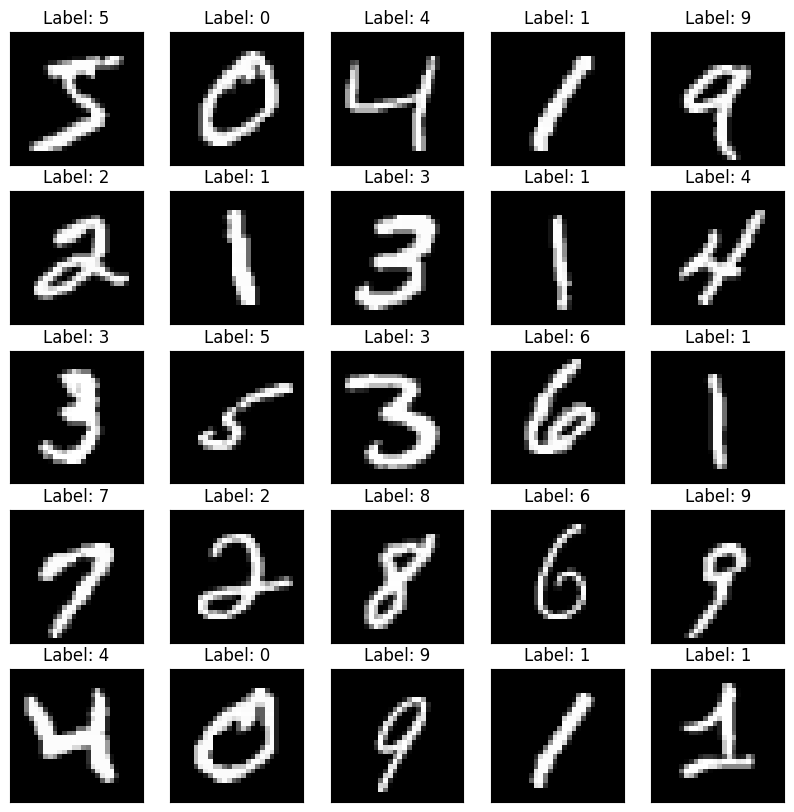

In [11]:
# Plot a sample of 25 images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
plt.show()

# Step 5: Build the Model

In [12]:
# Initialize the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Step 6: Train the Model

In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1255 - accuracy: 0.9621 - val_loss: 0.0462 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.0321 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0365 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0370 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0377 -

# Step 7: Evaluate the Model

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0340 - accuracy: 0.9915
Test accuracy: 0.9915000200271606


# Step 8: Visualize Training History

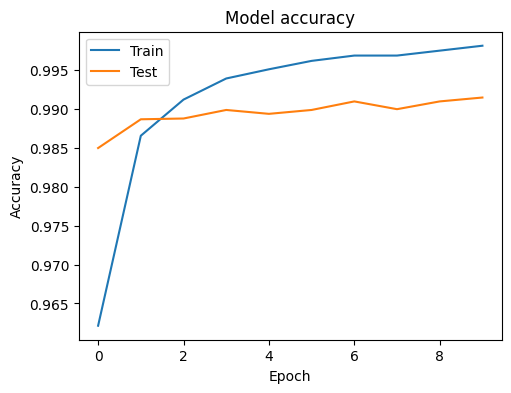

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

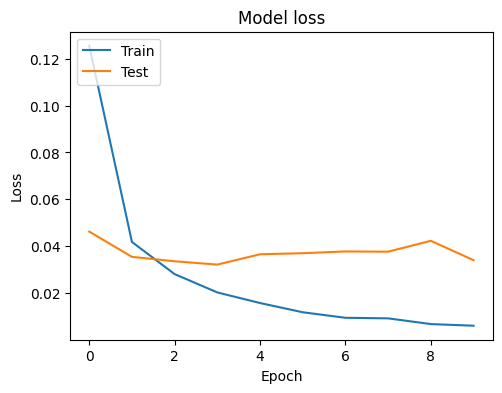

In [22]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.savefig('training_history.png')  # Save the plot as an image file


# Step 9: Make Predictions

In [23]:
# Make predictions on the test set
predictions = model.predict(x_test)


313/313 [==============================] - 3s 7ms/step


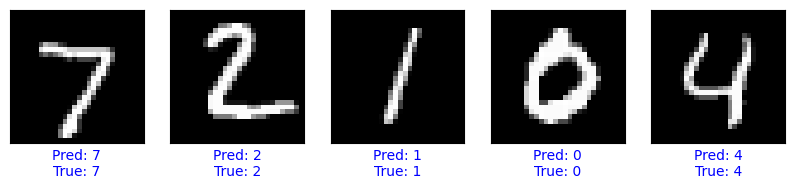

In [25]:
# Plot the first 5 test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
plt.savefig('predictions.png')  # Save the plot as an image file